In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy.stats import stats

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mobile-games-ab-testing/cookie_cats.csv


In [2]:
df = pd.read_csv('/kaggle/input/mobile-games-ab-testing/cookie_cats.csv')

In [3]:
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


# Boostrapping

In [4]:
# Counting the number of players in each AB group.
df.groupby('version')['userid'].count()

version
gate_30    44700
gate_40    45489
Name: userid, dtype: int64

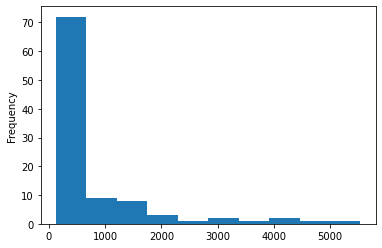

In [5]:
# This command makes plots appear in the notebook
%matplotlib inline

# Counting the number of players for each number of gamerounds 
plot_df = df.groupby('sum_gamerounds')['userid'].count()

# Plotting the distribution of players that played 0 to 100 game rounds
ax = plot_df.head(100).plot(x='sum_gamerounds',y='user_id',kind='hist')

In [6]:
# The % of users that came back the day after they installed
df['retention_1'].mean()

0.4452095044850259

In [7]:
# Calculating 1-day retention for each AB-group
df.groupby('version')['retention_1'].mean()

version
gate_30    0.448188
gate_40    0.442283
Name: retention_1, dtype: float64

<AxesSubplot:ylabel='Density'>

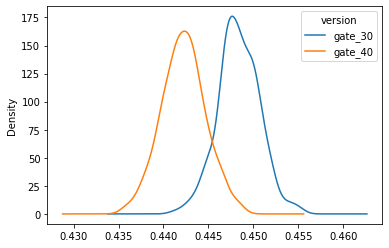

In [8]:
# Creating an list with bootstrapped means for each AB-group
boot_1d = []
for i in range(500):
    boot_mean = df.sample(frac=1,replace=True).groupby('version')['retention_1'].mean()
    boot_1d.append(boot_mean)
    
# Transforming the list to a DataFrame
boot_1d = pd.DataFrame(boot_1d).reset_index()
boot_1d.drop('index',axis=1,inplace=True)

# A Kernel Density Estimate plot of the bootstrap distributions
boot_1d.plot(kind='density')

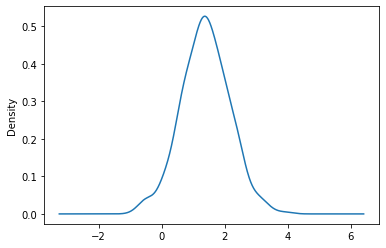

In [9]:
# Adding a column with the % difference between the two AB-groups
boot_1d['diff'] = (boot_1d['gate_30'] - boot_1d['gate_40'])/boot_1d['gate_40'] * 100

# Ploting the bootstrap % difference
ax = boot_1d['diff'].plot(kind='density')

In [10]:
# Calculating the probability that 1-day retention is greater when the gate is at level 30
prob = (boot_1d['diff'] > 0).mean()

# Pretty printing the probability
print('{:.1%}'.format(prob))

96.4%


97.0%


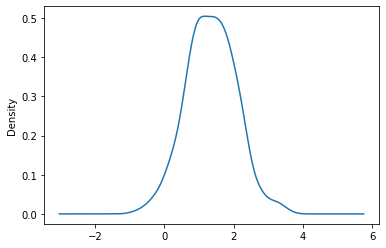

In [11]:
# Creating an list with bootstrapped means for each AB-group
boot_1d = []
for i in range(500):
    boot_mean = df.sample(frac=1,replace=True).groupby('version')['retention_1'].mean()
    boot_1d.append(boot_mean)
    
# Transforming the list to a DataFrame
boot_1d = pd.DataFrame(boot_1d).reset_index()
boot_1d.drop('index',axis=1,inplace=True)

# Adding a column with the % difference between the two AB-groups
boot_1d['diff'] = (boot_1d['gate_30'] - boot_1d['gate_40'])/boot_1d['gate_40'] * 100

# Ploting the bootstrap % difference
ax = boot_1d['diff'].plot(kind='density')

# Calculating the probability that 1-day retention is greater when the gate is at level 30
prob = (boot_1d['diff'] > 0).mean()

# Pretty printing the probability
print('{:.1%}'.format(prob))

# Chi-Squared Test

In [12]:
contingency = pd.crosstab(df['version'],df['retention_7'])

contingency

retention_7,False,True
version,,
gate_30,36198,8502
gate_40,37210,8279


In [13]:
from scipy.stats import chi2_contingency

# Chi-square test of independence.
c, p, dof, expected = chi2_contingency(contingency)

print ('p_value: {}'.format(p))

p_value: 0.0016005742679058301


# T-Test

In [14]:
df['sum_gamerounds'].mean()

51.8724567297564

In [15]:
df.groupby('version')['sum_gamerounds'].agg(['mean','std','var'])

,mean,std,var
version,,,
gate_30,52.456264,256.716423,65903.321897
gate_40,51.298776,103.294416,10669.736422


In [16]:
np.std(df['sum_gamerounds'])

195.04977619395936

In [17]:
df['sum_gamerounds'].describe()

count    90189.000000
mean        51.872457
std        195.050858
min          0.000000
25%          5.000000
50%         16.000000
75%         51.000000
max      49854.000000
Name: sum_gamerounds, dtype: float64

<AxesSubplot:ylabel='Frequency'>

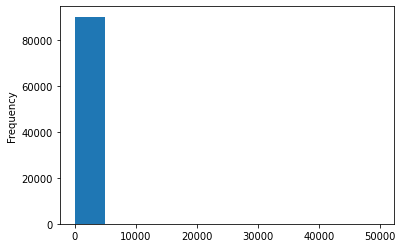

In [18]:
df['sum_gamerounds'].plot(kind='hist')

<AxesSubplot:xlabel='index'>

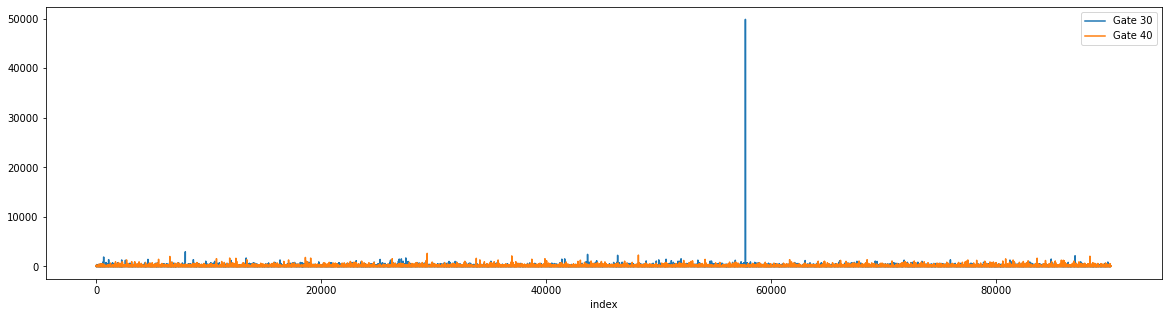

In [19]:
df[df.version == "gate_30"].reset_index().set_index("index").sum_gamerounds.plot(legend = True, label = "Gate 30", figsize = (20,5))
df[df.version == "gate_40"].reset_index().set_index("index").sum_gamerounds.plot(legend = True, label = "Gate 40")

In [20]:
df = df[df['sum_gamerounds'] < df['sum_gamerounds'].max()]

<AxesSubplot:xlabel='index'>

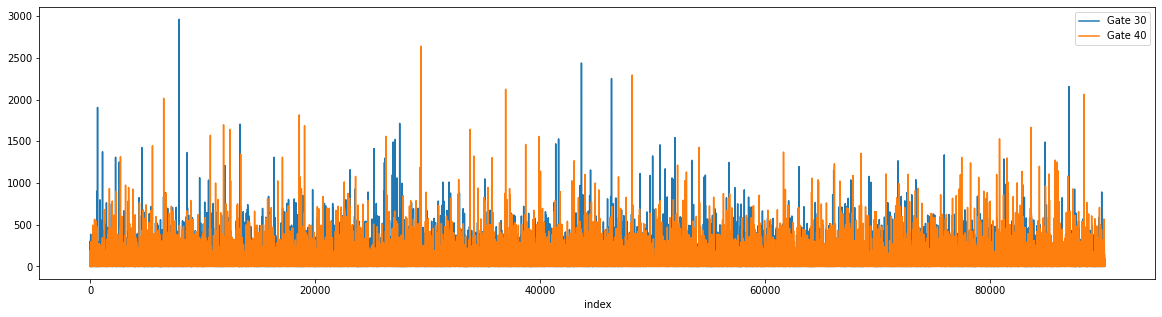

In [21]:
df[df.version == "gate_30"].reset_index().set_index("index").sum_gamerounds.plot(legend = True, label = "Gate 30", figsize = (20,5))
df[df.version == "gate_40"].reset_index().set_index("index").sum_gamerounds.plot(legend = True, label = "Gate 40")

<AxesSubplot:ylabel='Frequency'>

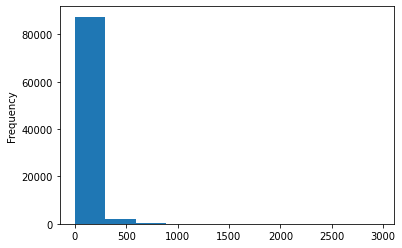

In [22]:
df['sum_gamerounds'].plot(kind='hist')

In [23]:
from scipy.stats import shapiro

shapiro(df['sum_gamerounds'])

/opt/conda/lib/python3.7/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.48558586835861206, pvalue=0.0)

In [24]:
# Split A/B
groupA = df[df['version'] == "gate_30"]['sum_gamerounds']
groupB = df[df['version'] == "gate_40"]['sum_gamerounds']
    
# Assumption: Normality
ntA = shapiro(groupA)[1] < 0.05
ntB = shapiro(groupB)[1] < 0.05
# H0: Distribution is Normal! - False
# H1: Distribution is not Normal! - True
    
if (ntA == False) & (ntB == False): # "H0: Normal Distribution"
    print('Normal')   
else:
    print('Not Normal')

Not Normal
